In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("airline_passengers.csv")

In [5]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


In [9]:
df.rename(columns={'Thousands of Passengers': 'Passengers'}, inplace=True)


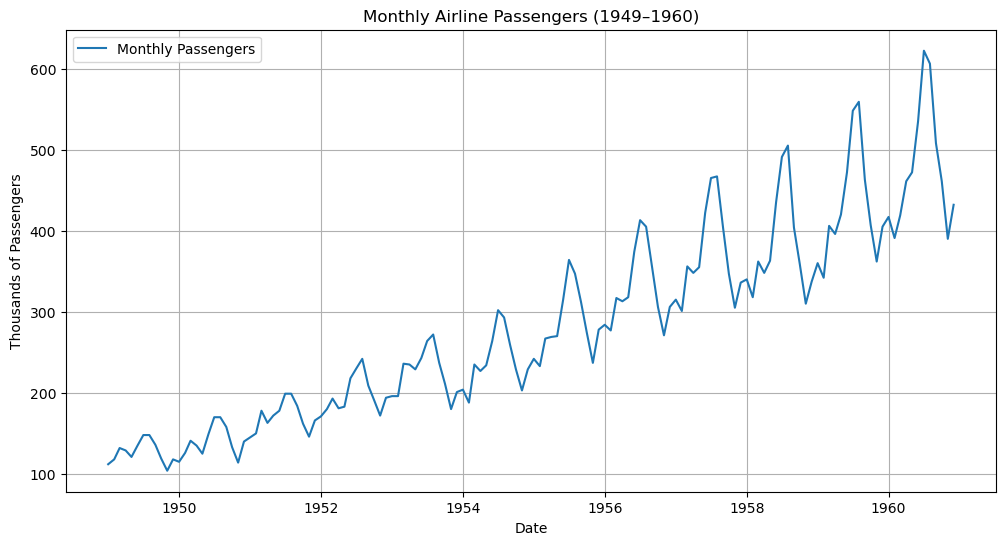

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df, label='Monthly Passengers')
plt.title('Monthly Airline Passengers (1949–1960)')
plt.xlabel('Date')
plt.ylabel('Thousands of Passengers')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Passengers'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


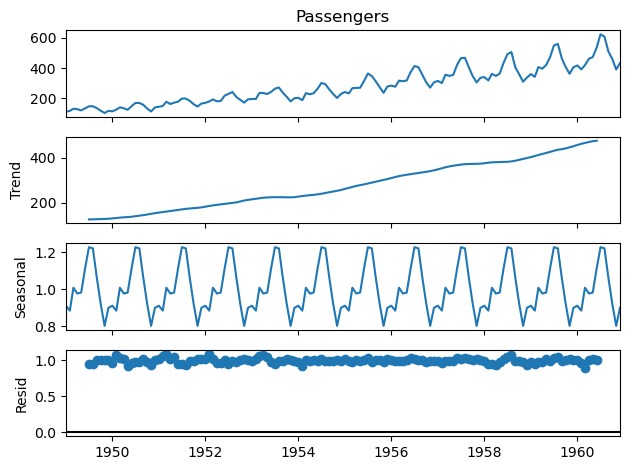

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')
decomposition.plot()
plt.tight_layout()
plt.show()


C:\Users\Vaishnavi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


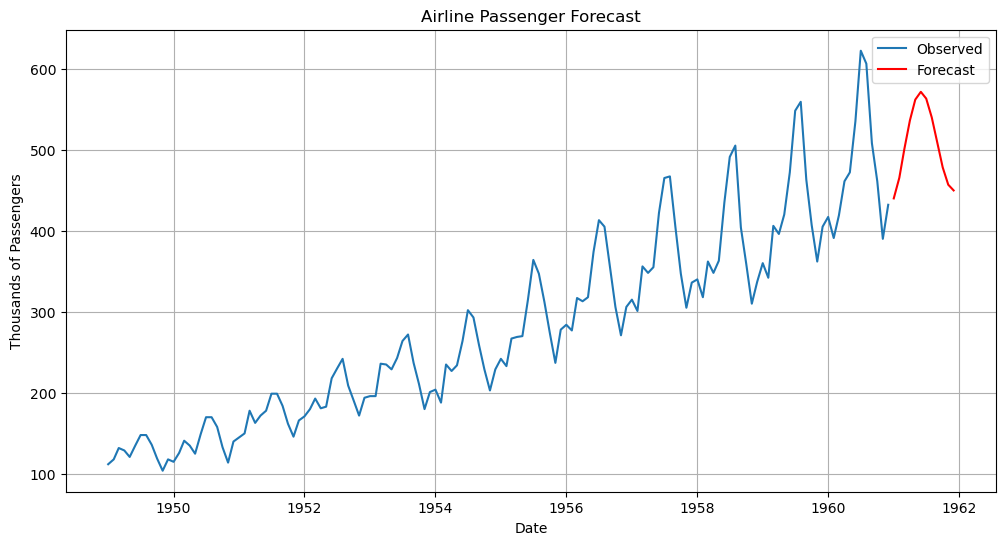

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p=2, d=1, q=2 is a reasonable start)
model = ARIMA(df['Passengers'], order=(2, 1, 2))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast.index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Airline Passenger Forecast')
plt.xlabel('Date')
plt.ylabel('Thousands of Passengers')
plt.legend()
plt.grid(True)
plt.show()
